In [1]:
import boto3 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

#defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data445-ashlyn-bucket'
bucket = s3.Bucket(bucket_name)

#defining the csv file
file_key = 'circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the csv file
circles = pd.read_csv(file_content_stream)
circles.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


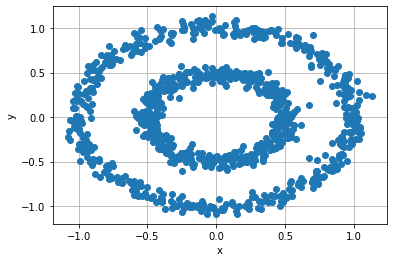

In [2]:
#visualizing the data
plt.plot(circles['x'], circles['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#the plot has 2 circles, one bigger and smaller

In [3]:
#0-1 scaler
scaler = MinMaxScaler()

circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles[['x', 'y']])
circles.head()

,x,y,x_0_1,y_0_1
0,0.421362,0.161185,0.677955,0.562456
1,-0.385647,0.449012,0.313458,0.692048
2,0.425654,-0.100170,0.679893,0.444782
3,-0.574566,0.741009,0.228130,0.823518
4,-0.255552,0.572340,0.372217,0.747576


In [4]:
#clustering the data into 2 clusters using spectral clustering
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])

#extracting and appending cluster numbers
circles['cluster'] = spectral_clustering.labels_
circles.head()

,x,y,x_0_1,y_0_1,cluster
0,0.421362,0.161185,0.677955,0.562456,1
1,-0.385647,0.449012,0.313458,0.692048,1
2,0.425654,-0.100170,0.679893,0.444782,1
3,-0.574566,0.741009,0.228130,0.823518,0
4,-0.255552,0.572340,0.372217,0.747576,1


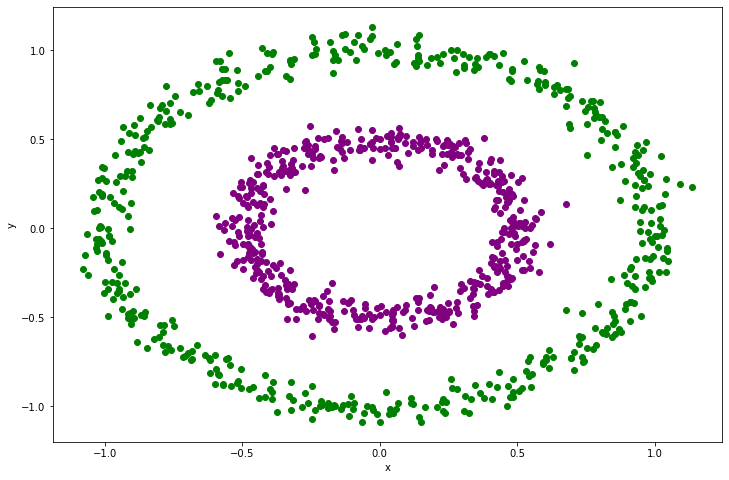

In [5]:
#visualizing data with cluster membership

colors = ['green', 'purple']
plt.figure(figsize = (12,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid

for i in circles['cluster'].unique():
    
    ## selecting data related to cluster i
    temp = circles[circles['cluster'] == i]
    plt.scatter(temp['x'], temp['y'], color = colors[i])